# Modulo 1 -   Python Odeint e Python GEKKO

## Resolver Equações Diferenciais em Python

O Python permite resolver equações diferenciais utilizando esses dois metódos. Começaremos pelo:

### Python Odeint

Odeint necescita de 3 dados de entrada:

```python
    y = odeint(model, y0 , t)
```
* Model : Nome da função que devolve valores derivados aos valores $y$ e $t$ solicitados como $\frac{\mathrm{d} y}{\mathrm{d} t}$ = modelo(y,t)
* y<sub>0</sub> :  Condições iniciais dos estados diferenciais
* t : Momentos em que a solução deve ser comunicada. Pontos internos adicionais são frequentemente calculados para manter a precisão da solução, mas não são comunicados.

#### Exemplo de problema

Um exemplo de utilização da odeint é com a seguinte equação diferencial com parâmetro $ k = 3$, a condição inicial $ y_{0} $ e a seguinte equação diferencial:
$$\frac{\mathrm{d} y(t)}{\mathrm{d} t} = -ky(t)$$

O código Python importa primeiro os necessários pacotes Numpy, Scipy, e Matplotlib. O modelo, as condições iniciais e os pontos de tempo são definidos como entradas para odeint calcular numericamente $y(t)$ .

In [52]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

* função que devolve $\frac{\mathrm{d} y}{\mathrm{d} t}$


In [75]:
def model(y,t):
    k = 0.3
    dydt = -k * y
    return dydt

* Condição Inicial

In [76]:
y0 = 5

* Pontos ao longo do tempo

In [77]:
t = np.linspace(0,20)

* Resolve a ODE

In [79]:
y = odeint(model,y0,t)

* Mostra o gráfico

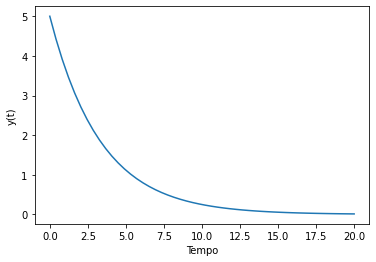

In [57]:
plt.plot(t,y)
plt.xlabel('Tempo')
plt.ylabel('y(t)')
plt.show()

### Argumentos adicionais de entrada

Uma quarta entrada opcional é args que permite que informação adicional seja passada para a função modelo. A entrada de args é uma sequência tuple de valores. O argumento é agora um input para a função modelo, incluindo um argumento adicional.
```python
    y = odeint(model, y0, t, args)
```

* __args__: Entradas adicionais para o modelo.

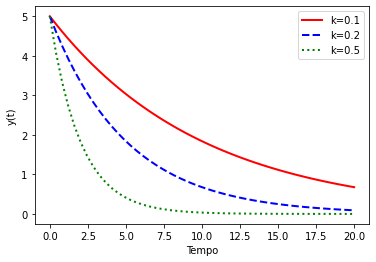

In [58]:
# função que retorna dy/dt
def model(y,t,k):
    dydt = -k * y
    return dydt

# condição inicial
y0 = 5

# pontos de tempo
t = np.linspace(0,20)

# resolve ODEs
k = 0.1
y1 = odeint(model,y0,t,args=(k,))
k = 0.2
y2 = odeint(model,y0,t,args=(k,))
k = 0.5
y3 = odeint(model,y0,t,args=(k,))

# plota resultados
plt.plot(t,y1,'r-',linewidth=2,label='k=0.1')
plt.plot(t,y2,'b--',linewidth=2,label='k=0.2')
plt.plot(t,y3,'g:',linewidth=2,label='k=0.5')
plt.xlabel('Tempo')
plt.ylabel('y(t)')
plt.legend()
plt.show()

## Exercícios

Encontrar uma solução numérica para as seguintes equações diferenciais com as condições iniciais associadas. Expandir o horizonte temporal solicitado até a solução atingir um estado estável. Mostrar um gráfico dos estados $x(t)$ e/ou $y(t)$. Relatar o valor final de cada estado como $t\rightarrow \infty $.

Problema 1

$$\frac{\mathrm{d} y(t)}{\mathrm{d} t} = -y(t)+1$$

$$y(0) = 0$$

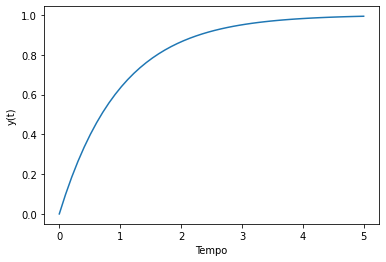

In [59]:
# função que retorna dy/dt

def model(y,t):
    dydt = -y + 1.0
    return dydt

# condição inicial

y0 = 0

# pontos de tempo

t = np.linspace(0,5)

# resolve ODEs

y = odeint(model,y0,t)

# plota resultos
plt.plot(t,y)
plt.xlabel('Tempo')
plt.ylabel('y(t)')
plt.show()

Problema 2


$$5 \frac{\mathrm{d} y(t)}{\mathrm{d} t} = -y(t)+u(t)$$

$$y(0) = 1$$
 $u$  passos $0$ de $2$ até $t$ = $0$ 

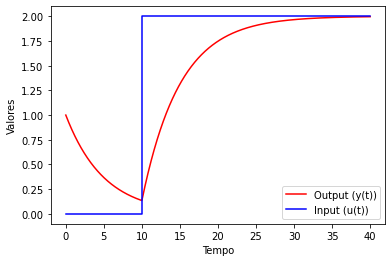

In [60]:
def model(y,t):
    # u steps from 0 to 2 at t=10
    if t<10.0:
        u = 0
    else:
        u = 2
    dydt = (-y + u)/5.0
    return dydt

y0 = 1

t = np.linspace(0,40,1000)

y = odeint(model,y0,t)

plt.plot(t,y,'r-',label='Output (y(t))')
plt.plot([0,10,10,40],[0,0,2,2],'b-',label='Input (u(t))')
plt.ylabel('Valores')
plt.xlabel('Tempo')
plt.legend(loc='best')
plt.show()

Problema 3

Solucionar $x(t)$ e $y(t)$ .Mostrar que as soluções são equivalentes.

$$\frac{\mathrm{d} x(t)}{\mathrm{d} t} = 3 exp(-t)$$
$$\frac{\mathrm{d} y(t)}{\mathrm{d} t} = -3-y(t)$$

$$y(0) = 0$$
$$y(0) = 0$$

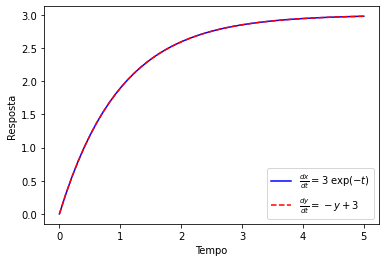

In [61]:
def model(z,t):
    dxdt = 3.0 * np.exp(-t)
    dydt = -z[1] + 3
    dzdt = [dxdt,dydt]
    return dzdt

z0 = [0,0]

t = np.linspace(0,5)

z = odeint(model,z0,t)

plt.plot(t,z[:,0],'b-',label=r'$\frac{dx}{dt}=3 \; \exp(-t)$')
plt.plot(t,z[:,1],'r--',label=r'$\frac{dy}{dt}=-y+3$')
plt.ylabel('Resposta')
plt.xlabel('Tempo')
plt.legend(loc='best')
plt.show()

Problema 4

$$2\frac{\mathrm{d} x(t)}{\mathrm{d} t} = -x(t) + u(t)$$
$$5\frac{\mathrm{d} y(t)}{\mathrm{d} t} = -y(t) + x(t)$$
$$ u = 2S(t-5)$$

$$y(0) = 0$$
$$y(0) = 0$$

Onde $S(t-5)$ é uma função de passo que muda de zero para um em $t = 5$. Quando é multiplicado por dois, muda de zero para dois ao mesmo tempo, $t = 5$.

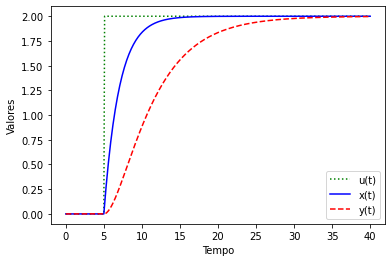

In [62]:
# funçao que returna dz/dt
def model(z,t,u):
    x = z[0]
    y = z[1]
    dxdt = (-x + u)/2.0
    dydt = (-y + x)/5.0
    dzdt = [dxdt,dydt]
    return dzdt

#Condição inicial
z0 = [0,0]

#Numero de pontos
n = 401

#Pontos ao longo do tempo
t = np.linspace(0,40,n)

# Input do Step
u = np.zeros(n)

# change to 2.0 at time = 5.0
u[51:] = 2.0


# Armazena as soluçoes
x = np.empty_like(t)
y = np.empty_like(t)

#Condiçoes iniciais Alocadas 
x[0] = z0[0]
y[0] = z0[1]

# Resolve a ODE
for i in range(1,n):
    # Espaço entre os passo
    tspan = [t[i-1],t[i]]
    # Resolve passo , interativo
    z = odeint(model,z0,tspan,args=(u[i],))
    # Armazena a informação para o grafico
    x[i] = z[1][0]
    y[i] = z[1][1]
    # Proxima informação
    z0 = z[1] 

# plot
plt.plot(t,u,'g:',label='u(t)')
plt.plot(t,x,'b-',label='x(t)')
plt.plot(t,y,'r--',label='y(t)')
plt.ylabel('Valores')
plt.xlabel('Tempo')
plt.legend(loc='best')
plt.show()

## Python GEKKO

GEKKO é um ambiente de optimização e simulação para Python que é diferente de pacotes como o Scipy.integrate.ODEINT. Além da simulação, GEKKO é uma plataforma de optimização para sistemas dinâmicos.

Um exemplo de utilização de GEKKO é com a seguinte equação diferencial com o parâmetro $k=0.3$, a condição inicial $y_{0}=5$ e a seguinte equação diferencial.

$$\frac{\mathrm{d} y(t)}{\mathrm{d} t} = -ky(t)$$

O código Python importa primeiro os necessários pacotes Numpy, GEKKO, e Matplotlib. O modelo, condições iniciais, e pontos de tempo são definidos em GEKKO para calcular numericamente $y(t)$.

In [63]:
import numpy as np
from gekko import GEKKO
import matplotlib.pyplot as plt

* A 4 linhas a seguir utilizaremos para criar o Ambiente do GEKKO

In [64]:
m = GEKKO()    # Cria o modelo GEKKO
k = 0.3        # constante
y = m.Var(5.0) # Variavel GEKKO
m.Equation(y.dt()==-k*y) # Equanção para o GEKKO

* Pontos para o gráfico

In [65]:
m.time = np.linspace(0,20) 

* Resolve a ODE

In [66]:
m.options.IMODE = 4
m.solve(disp=False)

* Plota o Resultado

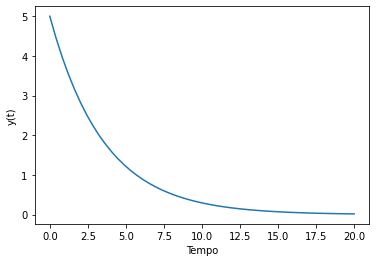

In [67]:
plt.plot(m.time,y)
plt.xlabel('Tempo')
plt.ylabel('y(t)')
plt.show()

Parâmetros de entrada tais como k podem ser alterados para gerar uma solução diferente com um parâmetro de entrada diferente. O argumento k é agora um parâmetro ajustável.

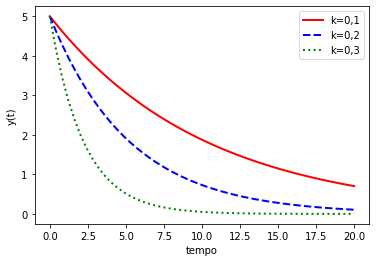

In [68]:

m = GEKKO() # criar modelo GEKKKO
k = m.Param() # constante
y = m.Var(5.0) # criar variável GEKKO
m.Equation(y.dt()==-k*y) # criar equação GEKKO
m.time = np.linspace(0,20) # pontos de tempo

# resolver ODEs e tramas
m.options.IMODE = 4
m.options.TIME_SHIFT=0

k.value = 0.1
m.solve(disp=False)
plt.plot(m.time,y,'r-',linewidth=2,label='k=0,1')

k.value = 0.2
m.solve(disp=False)
plt.plot(m.time,y,'b--',linewidth=2,label='k=0,2')

k.value = 0.5
m.solve(disp=False)
plt.plot(m.time,y,'g:',linewidth=2,label='k=0,3')

plt.xlabel('tempo')
plt.ylabel('y(t)')
plt.legend()
plt.show()


## Exercícios

Encontrar uma solução numérica para as seguintes equações diferenciais com as condições iniciais associadas. Expandir o horizonte temporal solicitado até a solução atingir um estado estável. Mostrar um gráfico dos estados $x(t)$ e/ou $y(t)$. Relatar o valor final de cada estado como $t\rightarrow \infty $.

Problema 1

$$\frac{\mathrm{d} y(t)}{\mathrm{d} t} = -y(t)+1$$

$$y(0) = 0$$

apm 191.182.3.97_gk_model13 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :            1
   Intermediates:            0
   Connections  :            0
   Equations    :            1
   Residuals    :            1
 
 Number of state variables:             98
 Number of total equations: -           98
 Number of slack variables: -            0
 ---------------------------------------
 Degrees of freedom       :              0
 
 **********************************************
 Dynamic Simulation with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains I

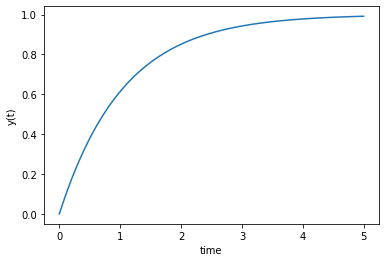

In [69]:
m = GEKKO()    
y = m.Var(0.0) 
m.Equation(y.dt()==-y+1) 
m.time = np.linspace(0,5) 

# Resolve ODE
m.options.IMODE = 4
m.solve()

# Plota o resultado
plt.plot(m.time,y)
plt.xlabel('time')
plt.ylabel('y(t)')

# Calcula o valor final quando estavel
m.options.IMODE = 3
m.solve(disp=False)
print('Valor Final: ' + str(y.value))

plt.show()

Problema 2

$$5 \frac{\mathrm{d} y(t)}{\mathrm{d} t} = -y(t)+u(t)$$

$$y(0) = 1$$
 $u$  passos $0$ de $2$ até $t$ = $0$ 

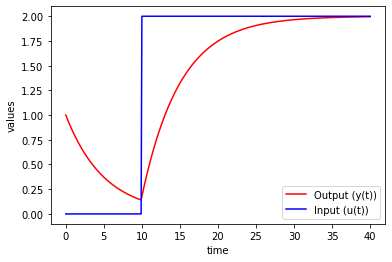

In [70]:
m = GEKKO()    # create GEKKO model
m.time = np.linspace(0,40,401) # time points

# create GEKKO parameter (step 0 to 2 at t=10)
u_step = np.zeros(401)
u_step[100:] = 2.0
u = m.Param(value=u_step)  

y = m.Var(1.0) # create GEKKO variable
m.Equation(5 * y.dt()==-y+u) # create GEKKO equation

# solve ODE
m.options.IMODE = 4
m.solve(disp=False)

# plot results
plt.plot(m.time,y,'r-',label='Output (y(t))')
plt.plot(m.time,u,'b-',label='Input (u(t))')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

Problema 3

Solucionar $x(t)$ e $y(t)$ .Mostrar que as soluções são equivalentes.

$$\frac{\mathrm{d} x(t)}{\mathrm{d} t} = 3 exp(-t)$$
$$\frac{\mathrm{d} y(t)}{\mathrm{d} t} = -3-y(t)$$

$$y(0) = 0$$
$$y(0) = 0$$

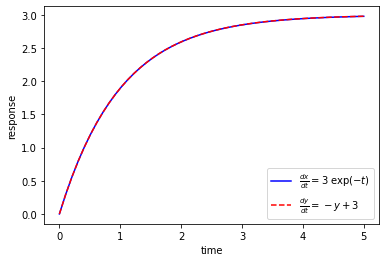

In [71]:
m = GEKKO()    # create GEKKO model
m.time = np.linspace(0,5) # time points

t = m.Var(0.0) # create GEKKO time
x = m.Var(0.0) # create GEKKO variable x
y = m.Var(0.0) # create GEKKO variable y

# create GEKKO equations
m.Equation(t.dt()==1)
m.Equation(x.dt()==3*m.exp(-t))
m.Equation(y.dt()==3-y)

# solve ODE
m.options.IMODE = 4
m.options.NODES = 3
m.solve(disp=False)

# plot results
plt.plot(t,x,'b-',label=r'$\frac{dx}{dt}=3 \; \exp(-t)$')
plt.plot(t,y,'r--',label=r'$\frac{dy}{dt}=-y+3$')
plt.ylabel('response')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()

Problema 4

$$2\frac{\mathrm{d} x(t)}{\mathrm{d} t} = -x(t) + u(t)$$
$$5\frac{\mathrm{d} y(t)}{\mathrm{d} t} = -y(t) + x(t)$$
$$ u = 2S(t-5)$$

$$y(0) = 0$$
$$y(0) = 0$$

Onde $S(t-5)$ é uma função de passo que muda de zero para um em $t = 5$. Quando é multiplicado por dois, muda de zero para dois ao mesmo tempo, $t = 5$.

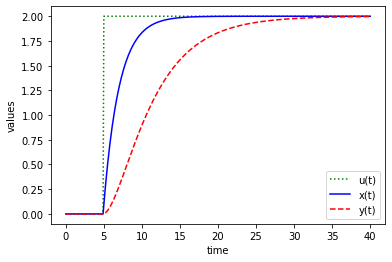

In [72]:
m = GEKKO()    # create GEKKO model
m.time = np.linspace(0,40,401) # time points

# create GEKKO parameter (step 0 to 2 at t=5)
u_step = np.zeros(401)
u_step[50:] = 2.0
u = m.Param(value=u_step)

# create GEKKO variables
x = m.Var(0.0)
y = m.Var(0.0)

# create GEKKO equations
m.Equation(2*x.dt()==-x+u)
m.Equation(5*y.dt()==-y+x)

# solve ODE
m.options.IMODE = 4
m.solve(disp=False)

# plot results
plt.plot(m.time,u,'g:',label='u(t)')
plt.plot(m.time,x,'b-',label='x(t)')
plt.plot(m.time,y,'r--',label='y(t)')
plt.ylabel('values')
plt.xlabel('time')
plt.legend(loc='best')
plt.show()